In [1]:
from load_data import load_data
import matplotlib.pyplot as plt

2023-07-20 19:05:12.995600: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
x_train, y_train, x_test, y_test = load_data()

In [10]:
from keras.models import Sequential
from keras.layers import Conv2D, Flatten, Dense

model = Sequential()
model.add(Conv2D(16, (3, 3), activation='relu', input_shape=(256, 256, 1)))
model.add(Conv2D(24, (3, 3), activation='relu'))
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dense(4, activation='softmax'))

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy', 'val_accuracy'])

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 254, 254, 16)      160       
                                                                 
 conv2d_3 (Conv2D)           (None, 252, 252, 24)      3480      
                                                                 
 flatten_1 (Flatten)         (None, 1524096)           0         
                                                                 
 dense_2 (Dense)             (None, 64)                97542208  
                                                                 
 dense_3 (Dense)             (None, 4)                 260       
                                                                 
Total params: 97,546,108
Trainable params: 97,546,108
Non-trainable params: 0
_________________________________________________________________


In [4]:
history = model.fit(x_train, y_train, batch_size=32, epochs=10, verbose=1)

Epoch 1/10
179/179 [==============================] - 274s 2s/step - loss: 2.0862 - accuracy: 0.6977
Epoch 2/10
179/179 [==============================] - 299s 2s/step - loss: 0.1951 - accuracy: 0.9333
Epoch 3/10
179/179 [==============================] - 315s 2s/step - loss: 0.0398 - accuracy: 0.9902
Epoch 4/10
179/179 [==============================] - 322s 2s/step - loss: 0.0081 - accuracy: 0.9993
Epoch 5/10
179/179 [==============================] - 327s 2s/step - loss: 0.0020 - accuracy: 0.9998
Epoch 6/10
179/179 [==============================] - 323s 2s/step - loss: 4.2738e-04 - accuracy: 1.0000
Epoch 7/10
179/179 [==============================] - 342s 2s/step - loss: 2.2539e-04 - accuracy: 1.0000
Epoch 8/10
179/179 [==============================] - 345s 2s/step - loss: 1.5490e-04 - accuracy: 1.0000
Epoch 9/10
179/179 [==============================] - 339s 2s/step - loss: 1.1486e-04 - accuracy: 1.0000
Epoch 10/10
179/179 [==============================] - 331s 2s/step - loss:

Text(0.5, 0, 'Epoch')

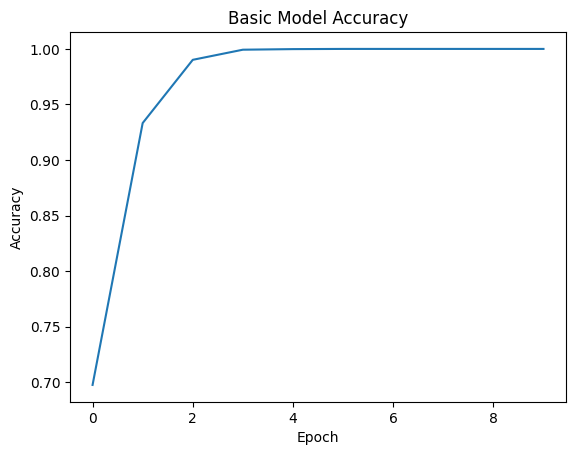

In [5]:
plt.title("Basic Model Accuracy")
plt.plot(history.history['accuracy'])
plt.ylabel("Accuracy")
plt.xlabel("Epoch")

Text(0.5, 0, 'Epoch')

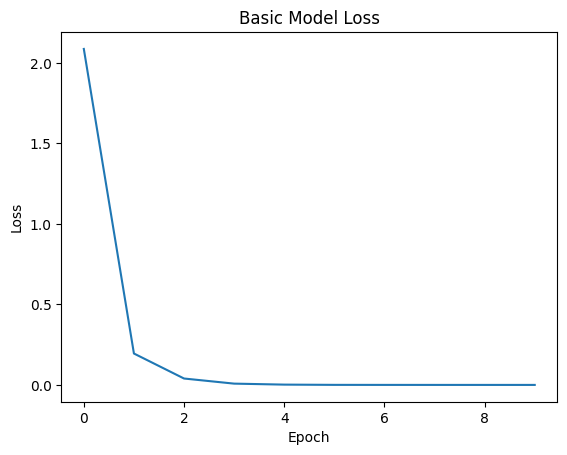

In [9]:
plt.title("Basic Model Loss")
plt.plot(history.history['loss'])
plt.ylabel("Loss")
plt.xlabel("Epoch")

In [7]:
score = model.evaluate(x_test, y_test, verbose=0)
print(dict(zip(model.metrics_names, score)))

{'loss': 0.5677011609077454, 'accuracy': 0.887109100818634}


In [8]:
history.history

{'loss': [2.0862045288085938,
  0.1950778067111969,
  0.03984985128045082,
  0.008110268041491508,
  0.0019815554842352867,
  0.0004273772065062076,
  0.0002253935090266168,
  0.00015490211080759764,
  0.00011486151197459549,
  8.598306885687634e-05],
 'accuracy': [0.6976540684700012,
  0.9332982897758484,
  0.9901960492134094,
  0.9992997050285339,
  0.9998249411582947,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0]}